**Group 4 - PPTI 16 (Customer Churn Prediction)**

**- Dustin Bijou Arasy | 2602189575**

**- Delvin Setiamin Salim | 2602189871**

**- Ruth Timorah | 2602189644**

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [209]:
data = pd.read_csv("https://raw.githubusercontent.com/Interblues88/ML-Project/main/Churn_Modelling.csv")

# **Explorary Data Analysis (EDA)**

In [210]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [212]:
#Summary Of The Data
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


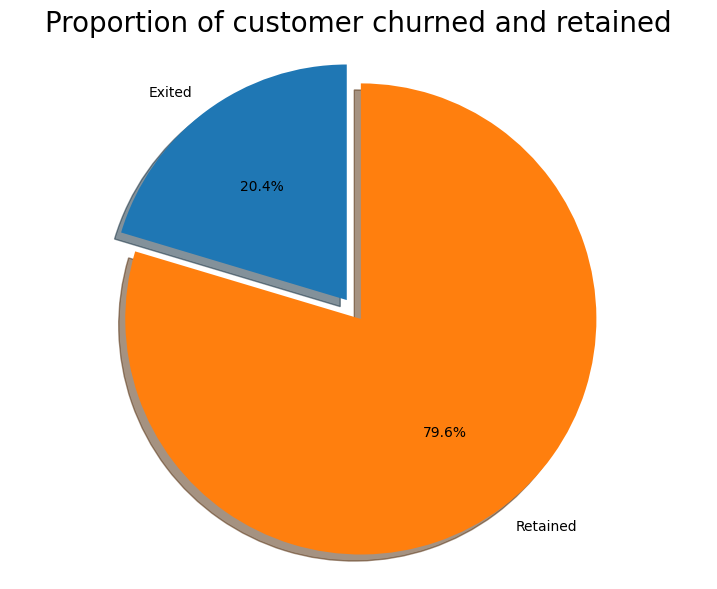

In [213]:
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

From above pie chart,we can see that around 20% of customers had churned i.e exited and 80% retained.This shows that our dataset is a little imbalanced so we have to predict customer churn with a good accuracy as this 20% customers are of more interest to the bank.

Text(0.5, 1.0, 'Countplot-Geography Column')

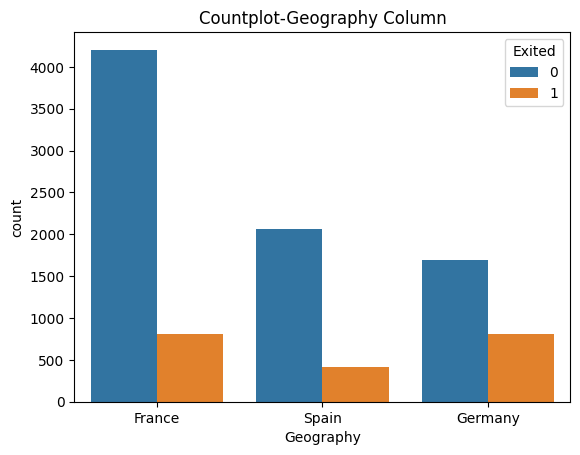

In [214]:
sb.countplot(x='Geography', hue = 'Exited',data = data).set_title('Countplot-Geography Column')

Text(0.5, 1.0, 'Countplot-Gender Column')

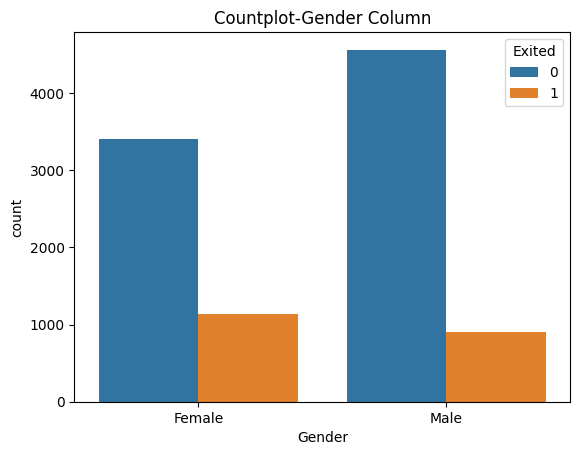

In [215]:
sb.countplot(x='Gender', hue = 'Exited',data = data).set_title('Countplot-Gender Column')

Text(0.5, 1.0, 'Countplot-HasCreditCard Column')

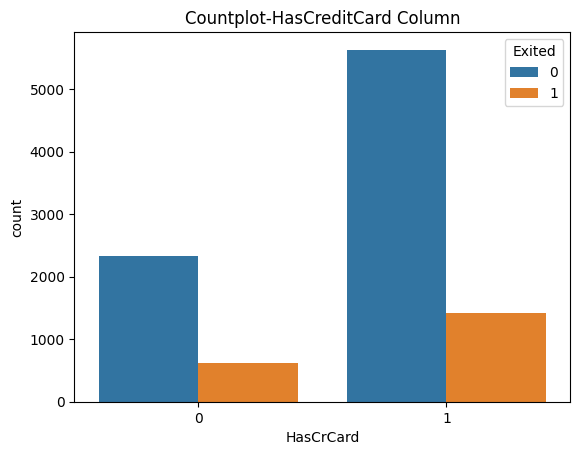

In [216]:
sb.countplot(x='HasCrCard', hue = 'Exited',data = data).set_title('Countplot-HasCreditCard Column')

Based on the countplots provided, we can derive the following observations:

1. The largest number of retained customers is from France, while the highest number of exiting customers is from Germany. This suggests a need for the bank to prioritize efforts on retaining customers from Germany, followed by France, to mitigate churn.

2. The proportion of female customers experiencing churn surpasses that of male customers.

3. Interestingly, customers with credit cards exhibit a higher churn rate, although this could be coincidental.

4. Inactive members, as anticipated, demonstrate a higher tendency to churn.

In [217]:
#Drop Unecessary Column
data = data.drop(columns= ['RowNumber', 'CustomerId', 'Surname'])

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [219]:
# Checking on geography column have what data
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# **Preprocessing Data**

In [220]:
# One-hot encoding is a popular technique used in machine learning and data processing to represent categorical variables or features as binary vectors.
le = LabelEncoder()

for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

In [221]:
#Check wether type data are not object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [222]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [223]:
#Customer who are still in the bank
(data.Exited==0).sum()

7963

In [224]:
newdata = data.drop(columns='Exited')

<Axes: title={'center': 'Correlated with Exited Column'}>

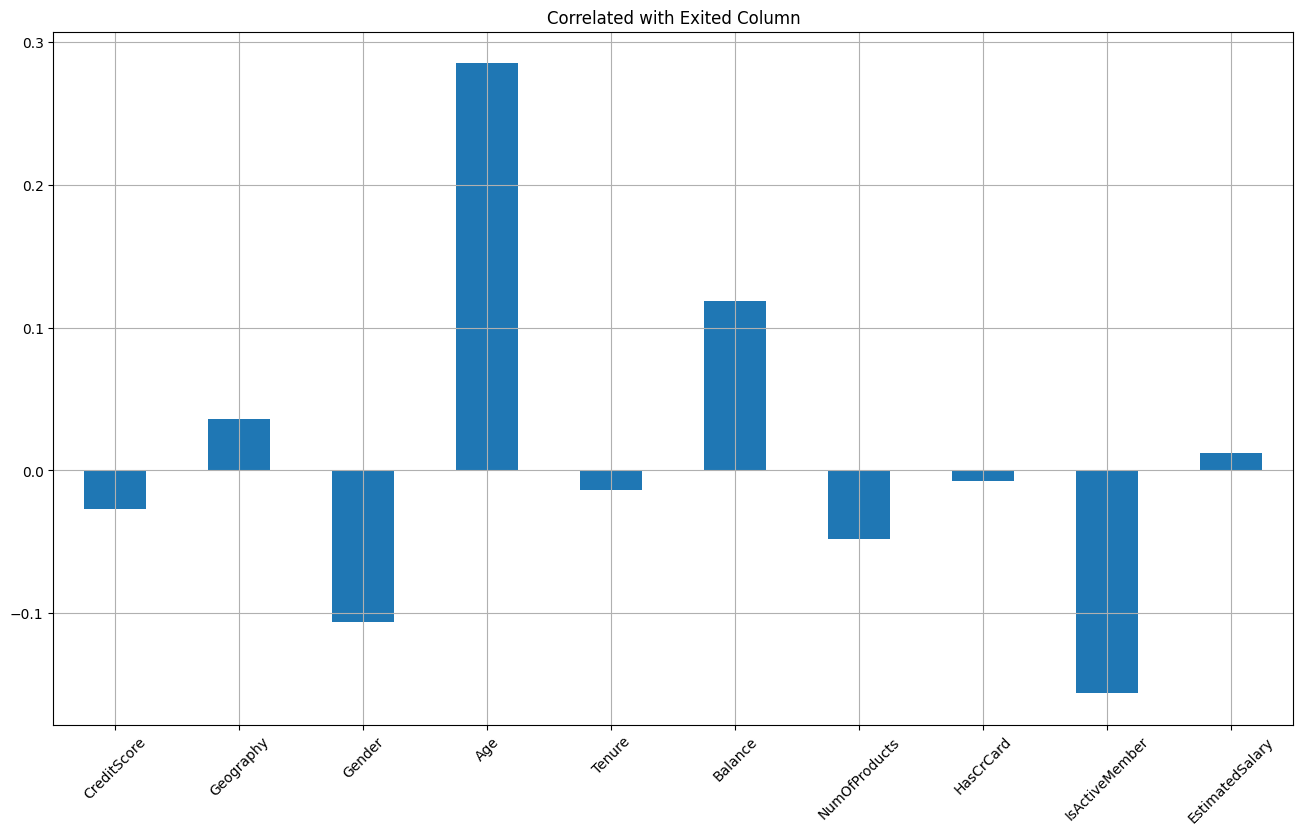

In [225]:
newdata.corrwith(data['Exited']).plot.bar(figsize=(16,9), title='Correlated with Exited Column', rot = 45,grid = True)
#For checking the correlation data compare to Exited column

# **Feature Engineering**

In [226]:
corr = data.corr()

<Axes: >

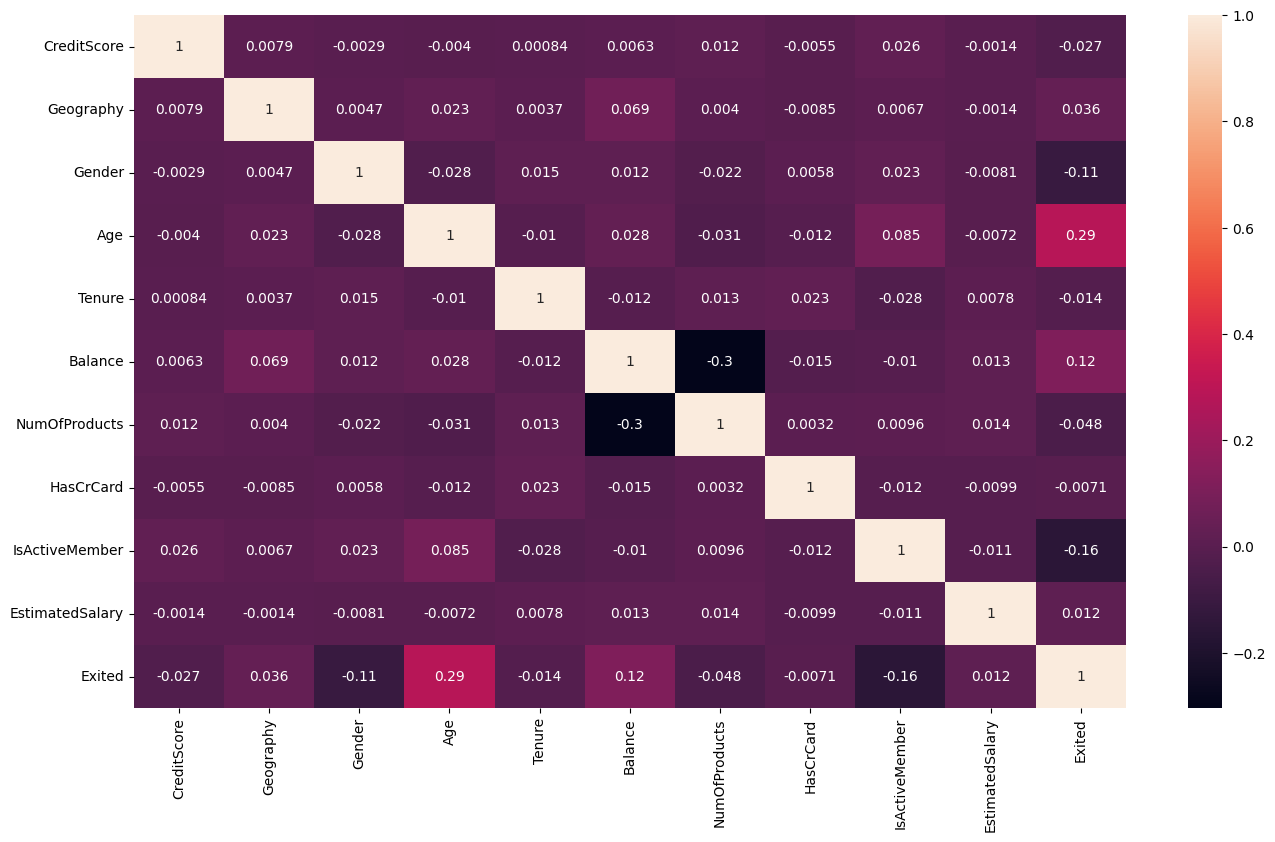

In [227]:
plt.figure(figsize=(16,9))
sb.heatmap(corr, annot=True)

In [228]:
X = data[['Age', 'Balance', 'Geography', 'IsActiveMember', 'Gender']]
y = data['Exited']

# **Training**

Train Data Ratio : 80%

Test Data Ratio : 20%

In [229]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

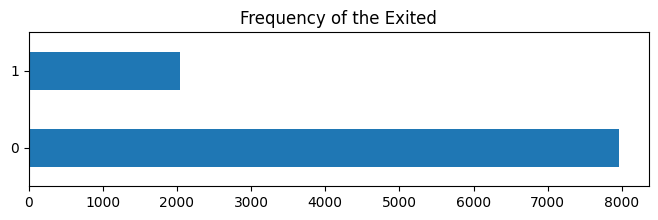

In [230]:
#Check wether the data are imbalanced
plt.figure(figsize=(8,2))
data.Exited.value_counts().plot(kind='barh')
plt.title("Frequency of the Exited")
plt.show()

The data are showing that the dataset are imbalanced between the exited customer and churn customer

In [231]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [233]:
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [234]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [235]:
X_train

array([[-0.40243781, -1.3269342 , -0.892877  , -0.78585773, -0.86880431],
       [-0.20502309, -0.23184624,  0.39377077, -0.78585773, -0.86880431],
       [-0.99468196, -0.65397653, -0.892877  ,  1.27249496, -0.86880431],
       ...,
       [ 0.68334314,  0.66735475,  0.39377077, -0.78585773, -0.86880431],
       [-0.50114516, -1.3269342 ,  1.68041855,  1.27249496, -0.86880431],
       [ 0.38722107, -0.02556796,  0.39377077,  1.27249496, -0.86880431]])

# **Evaluation of Model**

## **Logistic Regression**

In [236]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [237]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

In [238]:
y_pred = clf.predict(X_test)
y_TrainPred = clf.predict(X_train)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)


print("Train set acc : ", accuracy_score(y_train, y_TrainPred))
print("Test set acc : ", accuracy_score(y_test, y_pred))

print("Training :")
print(classification_report(y_train, y_TrainPred))
print("Testing :")
print(classification_report(y_test, y_pred))

Train set acc :  0.7485871271585557
Test set acc :  0.753609541745135
Training :
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      6370
           1       0.74      0.76      0.75      6370

    accuracy                           0.75     12740
   macro avg       0.75      0.75      0.75     12740
weighted avg       0.75      0.75      0.75     12740

Testing :
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1593
           1       0.75      0.76      0.75      1593

    accuracy                           0.75      3186
   macro avg       0.75      0.75      0.75      3186
weighted avg       0.75      0.75      0.75      3186



In [239]:
results=pd.DataFrame([['Logistic regression',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.75361,0.75415,0.7525,0.755807


In [240]:
print(confusion_matrix(y_test,y_pred))

[[1197  396]
 [ 389 1204]]


## **RandomForestClassifier**

In [241]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_TrainPred = clf.predict(X_train)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

RF_results=pd.DataFrame([['Random Forest Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
results.append(RF_results,ignore_index=True)

<ipython-input-241-506a3b69b4b4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append(RF_results,ignore_index=True)


,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.753610,0.754150,0.752500,0.755807
1,Random Forest Classifier,0.768362,0.768216,0.768699,0.767734


In [242]:
print("Train set acc : ", accuracy_score(y_train, y_TrainPred))
print("Test set acc : ", accuracy_score(y_test, y_pred))

print("Training :")
print(classification_report(y_train, y_TrainPred))
print("Testing :")
print(classification_report(y_test, y_pred))

Train set acc :  0.9343799058084772
Test set acc :  0.768361581920904
Training :
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6370
           1       0.93      0.94      0.93      6370

    accuracy                           0.93     12740
   macro avg       0.93      0.93      0.93     12740
weighted avg       0.93      0.93      0.93     12740

Testing :
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1593
           1       0.77      0.77      0.77      1593

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



In [243]:
print(confusion_matrix(y_test,y_pred))

[[1225  368]
 [ 370 1223]]


## **XGBClassifier**

In [244]:
# XGBClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_TrainPred = model.predict(X_train)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)


print("Train set acc : ", accuracy_score(y_train, y_TrainPred))
print("Test set acc : ", accuracy_score(y_test, y_pred))

print("Training :")
print(classification_report(y_train, y_TrainPred))
print("Testing :")
print(classification_report(y_test, y_pred))

Train set acc :  0.8500784929356358
Test set acc :  0.7919020715630886
Training :
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      6370
           1       0.86      0.84      0.85      6370

    accuracy                           0.85     12740
   macro avg       0.85      0.85      0.85     12740
weighted avg       0.85      0.85      0.85     12740

Testing :
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1593
           1       0.80      0.78      0.79      1593

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



## **XGBClassifier + Tuning**


In [245]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 150],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.9],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, verbose=-1, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.6}


In [246]:
grid_search.best_score_

0.8

In [247]:
y_pred0 = grid_search.best_estimator_.predict(X_train)
y_pred1 = grid_search.best_estimator_.predict(X_test)

print("Training :")
print(classification_report(y_train, y_pred0))
print("Testing :")
print(classification_report(y_test, y_pred1))

Training :
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6370
           1       0.86      0.84      0.85      6370

    accuracy                           0.86     12740
   macro avg       0.86      0.86      0.86     12740
weighted avg       0.86      0.86      0.86     12740

Testing :
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1593
           1       0.81      0.78      0.79      1593

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



In [248]:
# XGBClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
model = xgb.XGBClassifier(colsample_bytree= 0.6, learning_rate= 0.1, max_depth= 9, n_estimators= 150, subsample= 0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_TrainPred = model.predict(X_train)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)


print("Train set acc : ", accuracy_score(y_train, y_TrainPred))
print("Test set acc : ", accuracy_score(y_test, y_pred))

print("Training :")
print(classification_report(y_train, y_TrainPred))
print("Testing :")
print(classification_report(y_test, y_pred))

Train set acc :  0.8597331240188383
Test set acc :  0.7950408035153798
Training :
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6370
           1       0.87      0.85      0.86      6370

    accuracy                           0.86     12740
   macro avg       0.86      0.86      0.86     12740
weighted avg       0.86      0.86      0.86     12740

Testing :
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1593
           1       0.80      0.79      0.79      1593

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



## **Support Vector Machines (SVM)**

In [249]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

x, y = make_classification(n_samples=5000, n_features=10,
                           n_classes=3,
                           n_clusters_per_class=1)

lsvc = LinearSVC()
print(lsvc)

lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)

cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred0 = lsvc.predict(X_train)
ypred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, ypred)
print(cm)

cr0 = classification_report(y_train, ypred0)
cr1 = classification_report(y_test, ypred)

print("Training :")
print(cr0)
print("Testing :")
print(cr1)

print("Train set acc : ", accuracy_score(y_train, ypred0))
print("Test set acc : ", accuracy_score(y_test, ypred))


LinearSVC()
Score:  0.7493720565149137
CV average score: 0.75
[[1187  406]
 [ 383 1210]]
Training :
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      6370
           1       0.74      0.77      0.75      6370

    accuracy                           0.75     12740
   macro avg       0.75      0.75      0.75     12740
weighted avg       0.75      0.75      0.75     12740

Testing :
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1593
           1       0.75      0.76      0.75      1593

    accuracy                           0.75      3186
   macro avg       0.75      0.75      0.75      3186
weighted avg       0.75      0.75      0.75      3186

Train set acc :  0.7493720565149137
Test set acc :  0.7523540489642184
